In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tiktoken

In [30]:
def plot_data(data):
    sentence_lengths = {}
    sample_count = len(data)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo-1106")

    for i in range(0, len(data), 1):
        input = data[i]["instruction"]
        output = data[i]["output"]
        combined_sentence = input + " " + output
        length = len(encoding.encode(combined_sentence))

        if length in sentence_lengths:
            sentence_lengths[length] += 1
        else:
            sentence_lengths[length] = 1

    # Extract sentence lengths and their frequencies for train and test data
    data_lengths = list(sentence_lengths.keys())
    data_frequencies = list(sentence_lengths.values())

    # Calculate minimum, maximum, and median sentence lengths for train and test data
    min_length = min(data_lengths)
    max_length = max(data_lengths)
    median_length = np.median(data_lengths)
    mean_length = round(np.mean(data_lengths), 1)

    # Plot sentence lengths and their frequencies for train and test data
    plt.figure(figsize=(10, 6))
    plt.bar(data_lengths, data_frequencies, label=f"Sample count: {sample_count}")
    plt.axvline(
        x=min_length,
        color="r",
        linestyle="--",
        label=f"Min = {min_length}",
    )
    plt.axvline(
        x=max_length,
        color="g",
        linestyle="--",
        label=f"Max = {max_length}",
    )
    plt.axvline(
        x=median_length,
        color="b",
        linestyle="--",
        label=f"Median = {median_length}",
    )

    plt.axvline(
        x=mean_length,
        color="y",
        linestyle="--",
        label=f"Mean = {mean_length}",
    )

    plt.xlabel("Sentence Length")
    plt.ylabel("Frequency")
    plt.title("Distribution of sample lenghts in the dataset")
    plt.legend()
    plt.show()

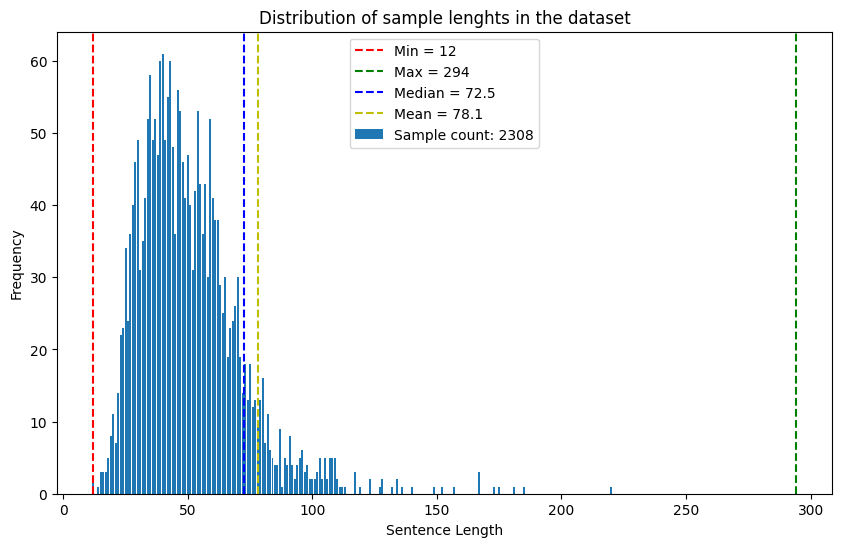

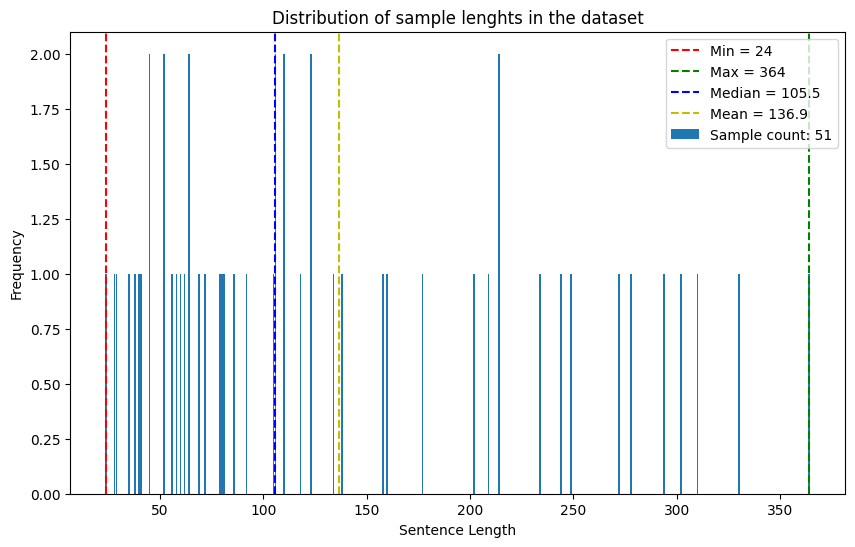

In [31]:
from datasets import load_dataset

dataset = load_dataset("Puidii/aalen_university_faculty_computer_science")

plot_data(dataset["train"])
plot_data(dataset["validation"])